 ## Load and Inspect the Data

 Loaded the dataset using ***Pandas***
 Inspect the structure using info(), head() and describe()
 Check for missing values isnull()

 No missing values where found. 
 An unnecessary column, "Unnamed: 0" was found.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("coursera_data.csv")

print(df.info())
print(df.head())
print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB
None
   Unnamed: 0                                       course_title  \
0         134  (ISC)² Systems Security Certified Practitioner...   
1         743  A Crash Course in Causality:  Inferring Causal...   
2         874                     A Crash Course in Data Science   
3         413                            A Law Student's Tool

## Clean the Data

 Drop unnecessary column "Unnamed: 0". 

In [3]:
df = df.drop(columns=["Unnamed: 0"])

def convert_students_enrolled(value):
    value = value.lower()
    if 'm' in value:
        return int(float(value.replace('m', '')) * 1000000)
    elif 'k' in value:
        return int(float(value.replace('k', '')) * 1000)
    else:
        return int(value)

df['course_students_enrolled'] = df['course_students_enrolled'].apply(convert_students_enrolled)

print(df.head())
print(df.info())

                                        course_title  \
0  (ISC)² Systems Security Certified Practitioner...   
1  A Crash Course in Causality:  Inferring Causal...   
2                     A Crash Course in Data Science   
3                            A Law Student's Toolkit   
4                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty  course_students_enrolled  
0          Beginner                      5300  
1      Intermediate                     17000  
2             Mixed                    130000  
3             Mixed                   

## Perform Basic Exploratory Data Analysis (EDA)

Explore key data points by: Counting courses by organization, Counting certification types, Counting difficulty levels
and Summarizing ratings & enrollments.

This will help us understand the distribution of categorical and numerical data.

In [3]:
print(df['course_organization'].value_counts())
print(df['course_Certificate_type'].value_counts())
print(df['course_difficulty'].value_counts())
print(df[['course_rating', 'course_students_enrolled']].describe())

course_organization
University of Pennsylvania    59
University of Michigan        41
Google Cloud                  34
Johns Hopkins University      28
Duke University               28
                              ..
The Linux Foundation           1
Palo Alto Networks             1
MathWorks                      1
BCG                            1
Mail.Ru Group                  1
Name: count, Length: 154, dtype: int64
course_Certificate_type
COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: count, dtype: int64
course_difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: count, dtype: int64
       course_rating
count     891.000000
mean        4.677329
std         0.162225
min         3.300000
25%         4.600000
50%         4.700000
75%         4.800000
max         5.000000


## Visualizing Course Difficulty Distribution

Created a bar chart to show the number of courses in each difficulty level. This helped to identify what course difficulty was the most common, which in this case was beginner level courses.

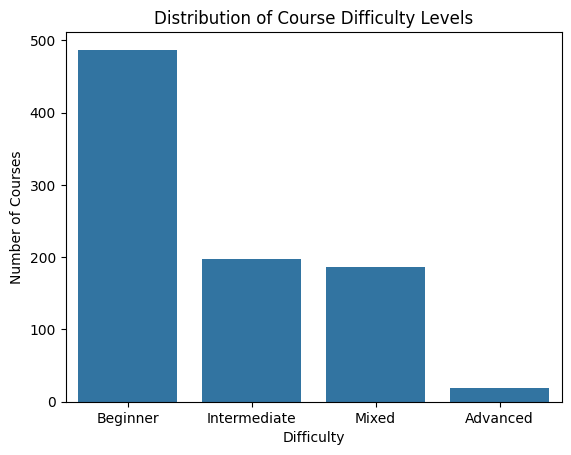

In [5]:

sns.countplot(x='course_difficulty', data=df)
plt.title("Distribution of Course Difficulty Levels")
plt.xlabel("Difficulty")
plt.ylabel("Number of Courses")
plt.show()

## Top Organizations by Number of Courses Offered

Display the top 10 organizations offering the most courses.

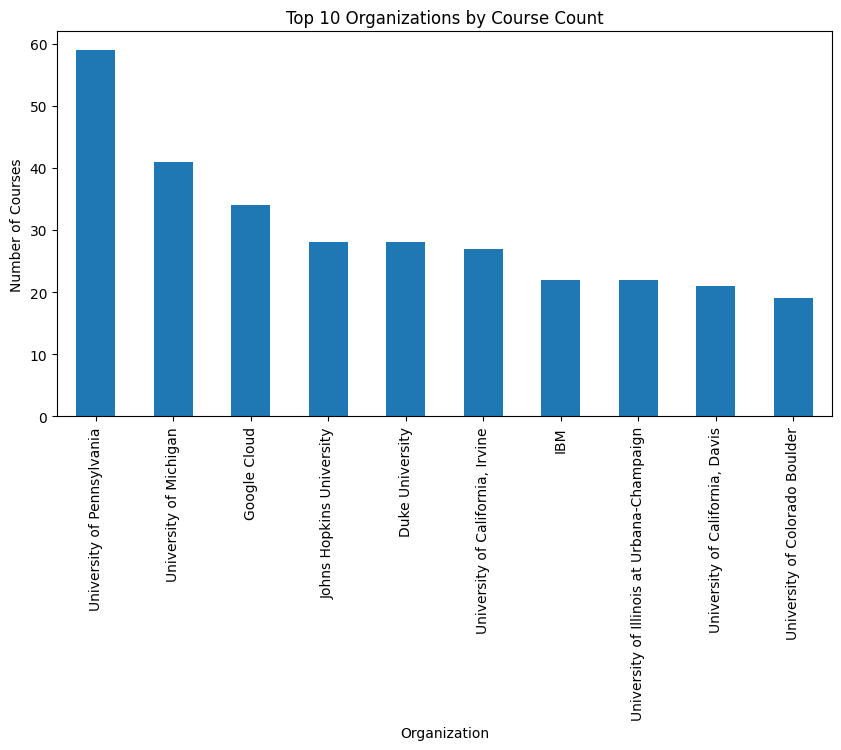

In [6]:
top_orgs = df['course_organization'].value_counts().head(10)
top_orgs.plot(kind='bar', figsize=(10, 5), title="Top 10 Organizations by Course Count")
plt.xlabel("Organization")
plt.ylabel("Number of Courses")
plt.show()

## Relationship Between Ratings and Enrollment (Scatter Plot)

Created a **scatter plot** to show the relationship between **course ratings and student enrollment**, applied a **log scale** to the y-axis to handle large variations in enrollment, and used **transparency (alpha=0.5)** to reduce overlapping points for better visibility.


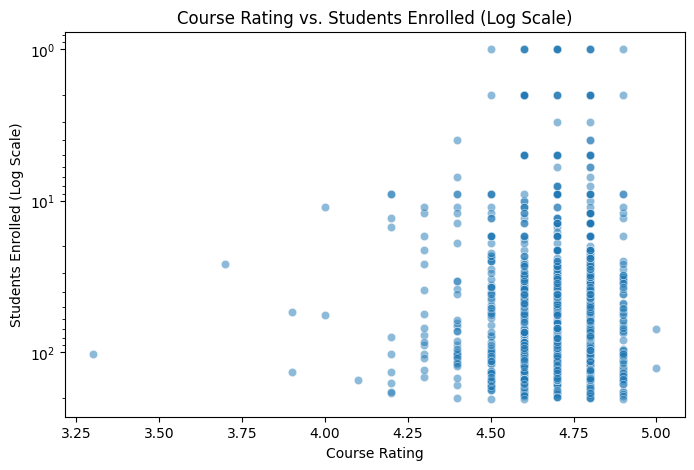

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='course_rating', y='course_students_enrolled', data=df, alpha=0.5)
plt.yscale('log')
plt.title("Course Rating vs. Students Enrolled (Log Scale)")
plt.xlabel("Course Rating")
plt.ylabel("Students Enrolled (Log Scale)")
plt.show()


## Most Popular Certification Types

Created a **pie chart** to visualize the distribution of **course certification types**, displayed percentage labels (`autopct='%1.1f%%'`), and set the **start angle to 90°** for better alignment. The **y-label was hidden** to keep the chart clean.

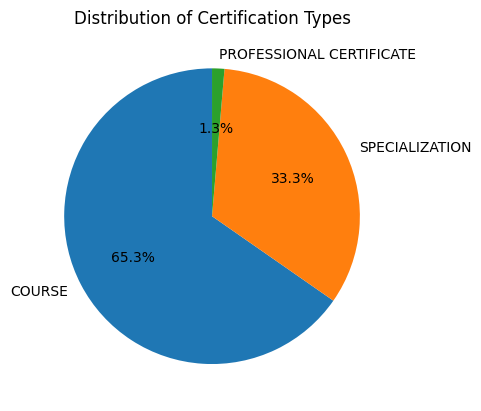

In [8]:
df['course_Certificate_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Certification Types")
plt.ylabel("")
plt.show()


# Conclusions: 

***Most Courses Are Offered by a Few Key Organizations:*** 

- The University of Pennsylvania has the highest number of courses (59), followed by the University of Michigan (41) and Google Cloud (34).

- There are 154 unique course providers, but many offer only one or very few courses.


***Majority of Courses Are Individual Courses, Not Specializations:*** 

- 582 courses are labeled as COURSE.

- 297 are SPECIALIZATIONS.

- Only 12 are PROFESSIONAL CERTIFICATES, which means industry-recognized programs are much less common.


***Beginner-Friendly Courses Are the Most Common:***

- 487 courses (55%) are for Beginners.

- Intermediate (198) and Mixed (187) courses are fairly balanced.

- Only 19 courses are Advanced (~2%), meaning very few courses are designed for experts.

- With this information we can suggest Coursera is primarily targeting entry-level learners, making it a beginner-friendly platform.


***Course Ratings Are Consistently High:***

- The average rating is 4.68, with 75% of courses rated 4.6 or higher.

- The minimum rating is 3.3, meaning there are very few poorly rated courses.

- The standard deviation (0.16) is very low, suggesting most courses receive similar, high ratings.

- Based on this information, we can affirm Coursera courses are generally well-received, and lower-rated courses are rare. 


## Suggested Improvements 

**Explore Trends Over Time** 

If timestamps or course launch dates are available, analyzing how course offerings, enrollments, and ratings have changed over time can reveal interesting trends and help understand if certain topics are growing in popularity.

**Investigate Correlations** 

Analyzing correlations between variables such as course difficulty, rating, and enrollment would help identify key relationships and better understand how difficulty impacts ratings or student engagement.

**Compare Organizations More Deeply** 

Instead of just counting courses per organization, analyze which organizations have the highest-rated or most enrolled courses, which could provide insights into what makes certain organizations more successful than others.